In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Data Handling and Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  

#Statistical Analysis
from scipy import stats

#Plotting and Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 120



#Machine Learning
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

In [4]:
#Load customer loans dataset
data_loans = pd.read_csv('CustomerLoans.csv',sep=',')
data_loans.head()

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved


In [5]:
#Load demographics dataset
data_demographics = pd.read_csv('Demographics.csv',sep=',')
data_demographics.head()

,custid,Name,Job,Age,Lat,Long,Income,CreditScore,ZipCode,MajorCity,State,MedianHomeValue,MedianHouseholdIncome,Debt
0,92886957,Barbara Thompson,Automotive Service Technicians and Mechanics,39,31.84568,-102.36764,43415,658,79761,Odessa,TX,94700,44174,23878.25
1,16462625,James Wade,Prosthodontists,93,42.73920,-84.62081,564164,786,48917,Lansing,MI,138000,51830,5641.64
2,89457436,Joel Jackson,Surgeons,99,44.27804,-88.27205,466344,676,54140,Little Chute,WI,139200,58247,233172.00
3,68462543,Tyler Clements,Physicians and Surgeons,100,33.50921,-111.89903,756171,694,85250,Scottsdale,AZ,250200,59358,378085.50
4,63315493,Adam Stephens,"Railroad Brake, Signal, and Switch Operators",97,33.93113,-117.54866,58948,688,92860,Norco,CA,385100,84905,30063.48


In [6]:
#Examine Missing Data
data_loans.isna().sum()
data_demographics.isna().sum()

custid                   0
Name                     0
Job                      0
Age                      0
Lat                      0
Long                     0
Income                   0
CreditScore              0
ZipCode                  0
MajorCity                0
State                    0
MedianHomeValue          0
MedianHouseholdIncome    0
Debt                     0
dtype: int64

In [7]:
#Examin outliers in customer loans dataset 
num_cols_loans = ['Income','CreditScore','Debt','LoanTerm','InterestRate','CreditIncidents','HomeValue','LoanAmount']
data_loans[(np.abs(stats.zscore(data_loans[num_cols_loans])) > 3).all(axis=1)]

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus


In [8]:
#Examin outliers in demographics dataset 
num_cols_customer = ['Age','Income','CreditScore','HouseholdSize','MedianHomeValue','Debt']
data_demographics[(np.abs(stats.zscore(data_demographics[num_cols_customer])) > 3).all(axis=1)]

KeyError: "['HouseholdSize'] not in index"

In [ ]:
#Providing descriptive statistics 
data_loans[num_cols_loans].describe()
data_demographics[num_cols_customer].describe()

In [ ]:
#Data histograms for customer loans 
data_loans[num_cols_loans].hist()
plt.tight_layout()

In [9]:
#Data histograms for demographics
data_demographics[num_cols_customer].hist()
plt.tight_layout()

KeyError: "['HouseholdSize'] not in index"

In [10]:
#Joining datasets together
cols_to_use =data_demographics.columns.difference(data_loans.columns).tolist()
cols_to_use.append('custid')
df = data_loans.merge(data_demographics[cols_to_use], on = 'custid')
df.head()

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus,Age,Job,Lat,Long,MajorCity,MedianHomeValue,MedianHouseholdIncome,Name,State,ZipCode
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved,39,Automotive Service Technicians and Mechanics,31.84568,-102.36764,Odessa,94700,44174,Barbara Thompson,TX,79761
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved,93,Prosthodontists,42.73920,-84.62081,Lansing,138000,51830,James Wade,MI,48917
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved,99,Surgeons,44.27804,-88.27205,Little Chute,139200,58247,Joel Jackson,WI,54140
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved,100,Physicians and Surgeons,33.50921,-111.89903,Scottsdale,250200,59358,Tyler Clements,AZ,85250
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved,97,"Railroad Brake, Signal, and Switch Operators",33.93113,-117.54866,Norco,385100,84905,Adam Stephens,CA,92860


In [11]:
#Create features 
num_features = ['Income','CreditScore','Debt','LoanTerm','InterestRate','CreditIncidents','HomeValue','LoanAmount',
               'Lat','Long','MedianHomeValue','MedianHouseholdIncome']
df_features = df[num_features]
# df_product_type = pd.get_dummies(df.ProductType,prefix='ProductType')
# df_features = pd.concat([df_features,df_product_type],axis=1)
features = df_features.values
targets = np.argmax(pd.get_dummies(df.LoanStatus).values,axis=1)
# print(features.shape)

In [12]:
#Scaling data 
scaler=MinMaxScaler()
X = scaler.fit_transform(features)

In [13]:
#Neural Network Model Creation

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [14]:
#Training and evaluate Model 

def train_and_evaluate__model(model, data_train, labels_train, data_test, labels_test):
    history = model.fit(data_train,labels_train,validation_data=(data_test,labels_test),epochs=30,batch_size=128)
    val_acc = history.history['val_accuracy'][-1]  # change this line if running on windows to: val_acc = history.history['val_accuracy'][-1] 
    return val_acc, history

In [15]:
#K-Fold cross validation 

scores = []
models = []
historys = []
num_splits = 3
kf = KFold(n_splits=num_splits)
kf.get_n_splits(X)
input_shape = X.shape[1]
print(input_shape)

fold = 0
for train_index, test_index in kf.split(X):
    print("Running fold {}".format(fold))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = targets[train_index], targets[test_index]
    model = create_model(input_shape)
    score, history = train_and_evaluate__model(model,X_train,y_train,X_test,y_test)
    scores.append(score)
    models.append(model)
    historys.append(history)
    fold += 1
    
print('\n\nEstimated Accuracy ' , (np.round(np.mean(scores),2)))

12
Running fold 0
Epoch 1/30
254/254 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7468 - val_loss: 0.5272 - val_accuracy: 0.7790
Epoch 2/30
254/254 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.7758 - val_loss: 0.5036 - val_accuracy: 0.7790
Epoch 3/30
254/254 [==============================] - 0s 999us/step - loss: 0.4948 - accuracy: 0.7758 - val_loss: 0.4708 - val_accuracy: 0.7790
Epoch 4/30
254/254 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7758 - val_loss: 0.4273 - val_accuracy: 0.7790
Epoch 5/30
254/254 [==============================] - 0s 953us/step - loss: 0.4172 - accuracy: 0.7758 - val_loss: 0.3823 - val_accuracy: 0.7790
Epoch 6/30
254/254 [==============================] - 0s 996us/step - loss: 0.3790 - accuracy: 0.7758 - val_loss: 0.3523 - val_accuracy: 0.7790
Epoch 7/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8307 - val_loss: 0.3343 - val

Epoch 28/30
254/254 [==============================] - 0s 925us/step - loss: 0.1606 - accuracy: 0.9351 - val_loss: 0.1613 - val_accuracy: 0.9305
Epoch 29/30
254/254 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.9370 - val_loss: 0.1577 - val_accuracy: 0.9389
Epoch 30/30
254/254 [==============================] - 0s 957us/step - loss: 0.1581 - accuracy: 0.9361 - val_loss: 0.1544 - val_accuracy: 0.9379
Running fold 2
Epoch 1/30
254/254 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.7740 - val_loss: 0.4818 - val_accuracy: 0.7822
Epoch 2/30
254/254 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7742 - val_loss: 0.4012 - val_accuracy: 0.7822
Epoch 3/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.7828 - val_loss: 0.3499 - val_accuracy: 0.8618
Epoch 4/30
254/254 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8564 - val_loss: 0.3202 - val_a

In [16]:
#model creation after K-Fold cross validation 
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.20, random_state=42)
model = create_model(input_shape)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=30,batch_size=128)


Epoch 1/30
305/305 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7727 - val_loss: 0.5159 - val_accuracy: 0.7764
Epoch 2/30
305/305 [==============================] - 0s 928us/step - loss: 0.4870 - accuracy: 0.7775 - val_loss: 0.4336 - val_accuracy: 0.7764
Epoch 3/30
305/305 [==============================] - 0s 858us/step - loss: 0.3924 - accuracy: 0.8305 - val_loss: 0.3386 - val_accuracy: 0.8810
Epoch 4/30
305/305 [==============================] - 0s 879us/step - loss: 0.3251 - accuracy: 0.8725 - val_loss: 0.2990 - val_accuracy: 0.8806
Epoch 5/30
305/305 [==============================] - 0s 952us/step - loss: 0.2917 - accuracy: 0.8861 - val_loss: 0.2687 - val_accuracy: 0.8949
Epoch 6/30
305/305 [==============================] - 0s 913us/step - loss: 0.2665 - accuracy: 0.8977 - val_loss: 0.2520 - val_accuracy: 0.8971
Epoch 7/30
305/305 [==============================] - 0s 888us/step - loss: 0.2466 - accuracy: 0.9054 - val_loss: 0.2275 - val_accuracy: 0

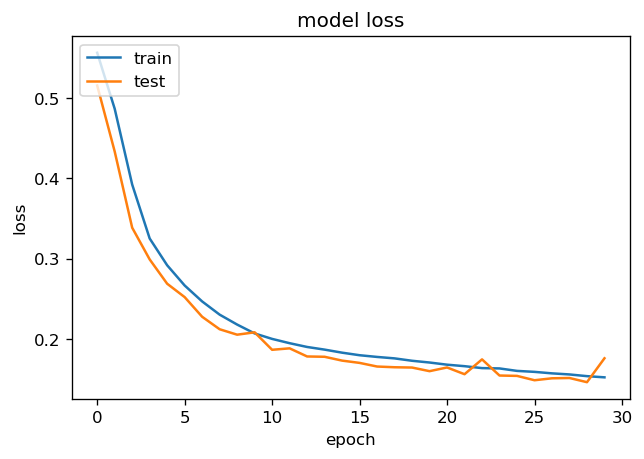

In [17]:
#model performance (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

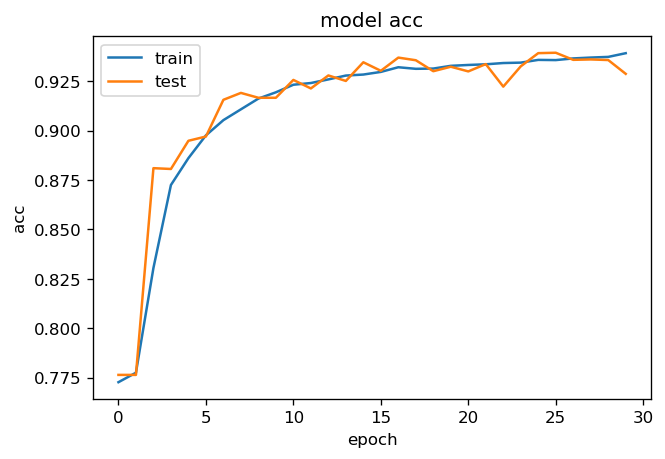

In [18]:
#model performance (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

In [19]:
# save the model
model.save('my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model/assets


In [20]:
# load the model
new_model = tf.keras.models.load_model('my_model')

# Check its architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                